In [1]:
#importing first required libraries to run code
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import multiprocessing
from random import shuffle

In [2]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 9.8MB/s 


# Preprocessing datasets

In [3]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

In [13]:
tagged_tweet = pd.read_excel('/content/tagged_tweet.xlsx')

In [14]:
tagged_tweet.head()

,Index,Tweet,Value
0,0,1 Berhubung sdg hangat pembangunan di TN Komod...,0
1,1,1 Kenapa sekarang baru ramai terkait isu Pulau...,-1
2,2,1 biar kita lupa masalah2 yang lalu2 atau nutu...,-1
3,3,1 lg teman mengeluh katanya dia sudah berusaha...,0
4,4,100 atau 1 4jt untuk 1 orang yang follow aku d...,0


In [15]:
tagged_tweet.shape

(1354, 3)

### stemming and remove punctuation

stemming dan remove punctuation untuk tweetnya


In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
res = []
for kalimat in tagged_tweet.Tweet:
    token = tokenizer.tokenize(kalimat)
    st = " ".join(token)
    res.append(st)

In [17]:
res[0:3]

['1 Berhubung sdg hangat pembangunan di TN Komodo dan dampak thd komodo Sy ingin berbagi ttg penelitian kami Komodo',
 '1 Kenapa sekarang baru ramai terkait isu Pulau Rinca yang akan disulap besar besaran oleh pemerintah dan investor swasta sebagai destinasi wisata premium Karena mafianya tidak ajak ikut proyek tersebut makanya bikin fitnah Jaga Dirimu Dari Kovid CiptaKerjaLindungiAlam',
 '1 biar kita lupa masalah2 yang lalu2 atau nutupin masalah apa lagi ini Partai apa jual tanah atau sahkan UUD atau nutupin masalah Pulau KOMODO']

In [18]:
factoryStem = StemmerFactory()
stemmer = factoryStem.create_stemmer()
factoryStop = StopWordRemoverFactory()
stopword = factoryStop.create_stop_word_remover()

In [19]:
for index in range(len(res)):
    kalimatStemmed = stemmer.stem(res[index])
    kalimatStopped = stopword.remove(kalimatStemmed)
    res[index] = kalimatStopped

In [20]:
tagged_tweet['processed_tweet'] = res

In [21]:
tagged_tweet.head()

,Index,Tweet,Value,processed_tweet
0,0,1 Berhubung sdg hangat pembangunan di TN Komod...,0,1 hubung sdg hangat bangun tn komodo dampak th...
1,1,1 Kenapa sekarang baru ramai terkait isu Pulau...,-1,1 sekarang baru ramai kait isu pulau rinca aka...
2,2,1 biar kita lupa masalah2 yang lalu2 atau nutu...,-1,1 biar lupa masalah2 lalu2 nutupin masalah apa...
3,3,1 lg teman mengeluh katanya dia sudah berusaha...,0,1 lg teman keluh kata sudah usaha baik jaga si...
4,4,100 atau 1 4jt untuk 1 orang yang follow aku d...,0,100 1 4jt 1 orang follow aku jika rt tweet end...


In [22]:
tagged_tweet.to_csv('./final_tweet.csv')

In [23]:
pip install -U gensim

     |████████████████████████████████| 24.2MB 1.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [26]:
tagged_tweet.head()

,Index,Tweet,Value,processed_tweet
0,0,1 Berhubung sdg hangat pembangunan di TN Komod...,0,1 hubung sdg hangat bangun tn komodo dampak th...
1,1,1 Kenapa sekarang baru ramai terkait isu Pulau...,-1,1 sekarang baru ramai kait isu pulau rinca aka...
2,2,1 biar kita lupa masalah2 yang lalu2 atau nutu...,-1,1 biar lupa masalah2 lalu2 nutupin masalah apa...
3,3,1 lg teman mengeluh katanya dia sudah berusaha...,0,1 lg teman keluh kata sudah usaha baik jaga si...
4,4,100 atau 1 4jt untuk 1 orang yang follow aku d...,0,100 1 4jt 1 orang follow aku jika rt tweet end...


### tokenize, lowering case and create a list of doc related to the word we want to disambiguate

In [28]:
result = []


for index,row in tagged_tweet.iterrows():
  tweet = row['processed_tweet']
  val = ''+str(row['Value'])
  result.append(TaggedDocument(words=word_tokenize(tweet.lower()),tags=val))


In [29]:
import random

random.shuffle(result)

## Start Processing data use Doc2vec, and create specific model for specific word that wanted to disambiguate

Split the test and train for every related key word that we want to predict the sense

In [30]:
y = [doc.tags for doc in result]
X = [doc.words for doc in result]

for i in range(5):
  print(X[i])

['komodo', 'kicik', 'dlu', 'na']
['awk', 'ga', 'ikut', 'komen', 'yah', 'soal', 'labu', 'bajo', 'pulau', 'komodo', 'sekitar', 'lupa', 'bapak', 'cemewewnya', 'kan', 'yg', 'ikut', 'proyek']
['pulau', 'rinca', 'taman', 'nasional', 'komodo', 'bangun', 'fasilitas', 'pusat', 'informasi', 'komodo', 'wisatawan', 'tidak', 'singgung', 'langsung', 'komodo', 'sekarang', 'ada', 'jalan', 'gantung', 'atas', 'darat', 'boardwalk', 'u', 'lihat', 'komodo', 'dr', 'atas']
['tanduk', 'persis', 'urus', 'komodo', 'viral', 'dulu', 'resin', 'kemudian']
['cedal', 'komodo', 'buaya', 'jenis']


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
train_tagged, test_tagged = train_test_split(result,test_size=0.3)

In [34]:
print('train tagged length is  '+str(len(train_tagged))+' test tagged length is '+str(len(test_tagged)))

train tagged length is  947 test tagged length is 407


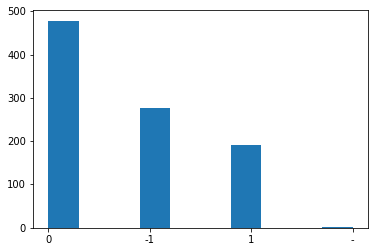

In [35]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(y_train)
plt.hist(y);
plt.show()

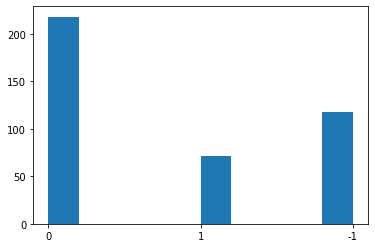

In [36]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(y_test)
plt.hist(y);
plt.show()

\*catatan : dalam setiap train terdapat list of Xtrain dan ytrain, begitu pula dalam setiap test terdapat list of Xtest dan ytest

X ada pada index **0** dan y ada pada index **1**

In [37]:
from sklearn import utils

In [38]:
cores = multiprocessing.cpu_count()
cores

2

### Model PV-DBOW experiment

In [119]:
model_pvdbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_pvdbow.build_vocab(result)
for epoch in tqdm(range(20)):
  model_pvdbow.train(utils.shuffle(result), total_examples=len(result), epochs=1)
  model_pvdbow.alpha -= 0.002
  model_pvdbow.min_alpha = model_pvdbow.alpha
model_pvdbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

100%|██████████| 20/20 [00:01<00:00, 11.66it/s]


In [120]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [121]:
def buat_vector_input(model, docs):
    vector = [model.infer_vector(doc, steps=20) for doc in docs]
    return vector

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
dct_logreg_model = {}

In [124]:
y_train, X_train = vec_for_learning(model_pvdbow, train_tagged)
y_test, X_test = vec_for_learning(model_pvdbow, test_tagged)

In [125]:
logreg = LogisticRegression(n_jobs=1, C=1e5,max_iter=1500000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

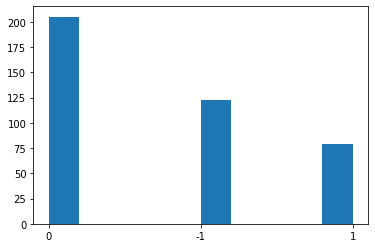

PV-DBOW with Logistic Regression
Number of Neutral Tweet is 205
Number of Positive Tweet is 79
Number of Negative Tweet is 123


In [126]:
import matplotlib.pyplot as plt
import numpy as np
count_1 = 0
count_min = 0
count_0 = 0
y_pred_final=[]
for i in y_pred:
  if i =='-':
    y_pred_final.append('-1')
    count_min = count_min+1 
  else:
    y_pred_final.append(i)
    if i =='1':
      count_1 = count_1+1
    else:
      count_0 = count_0+1
y = np.array(y_pred_final)
plt.hist(y);
plt.show()
print("PV-DBOW with Logistic Regression")
print("Number of Neutral Tweet is "+str(count_0))
print("Number of Positive Tweet is "+str(count_1))
print("Number of Negative Tweet is "+str(count_min))

In [127]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5061425061425061
Testing F1 score: 0.5015214094616904


In [128]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

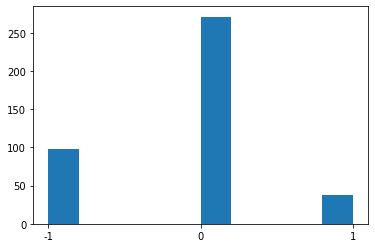

PV-DBOW with SVM
Number of Neutral Tweet is 271
Number of Positive Tweet is 38
Number of Negative Tweet is 98


In [129]:
import matplotlib.pyplot as plt
import numpy as np
count_1 = 0
count_min = 0
count_0 = 0
y_pred_final=[]
for i in y_pred:
  if i =='-':
    y_pred_final.append('-1')
    count_min = count_min+1 
  else:
    y_pred_final.append(i)
    if i =='1':
      count_1 = count_1+1
    else:
      count_0 = count_0+1
y = np.array(y_pred_final)
plt.hist(y);
plt.show()
print("PV-DBOW with SVM")
print("Number of Neutral Tweet is "+str(count_0))
print("Number of Positive Tweet is "+str(count_1))
print("Number of Negative Tweet is "+str(count_min))

In [130]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5749385749385749
Testing F1 score: 0.5488524633363995


### Model PV-DM experiment

In [131]:
dct_modeldm = {}

In [132]:
model_pvdm = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_pvdm.build_vocab(result)
for epoch in tqdm(range(20)):
  model_pvdm.train(utils.shuffle(result), total_examples=len(result), epochs=1)
  model_pvdm.alpha -= 0.002
  model_pvdm.min_alpha = model_pvdbow.alpha
model_pvdm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

100%|██████████| 20/20 [00:02<00:00,  7.35it/s]


In [133]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [134]:
y_train, X_train = vec_for_learning(model_pvdm, train_tagged)
y_test, X_test = vec_for_learning(model_pvdm, test_tagged)

In [136]:
logreg = LogisticRegression(n_jobs=1, C=1e3,max_iter=80000000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

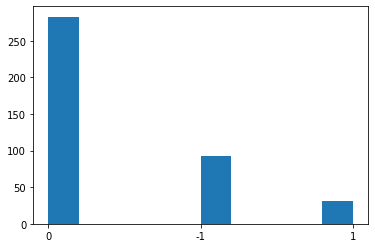

PV-DM with Logistic Regression
Number of Neutral Tweet is 283
Number of Positive Tweet is 31
Number of Negative Tweet is 93


In [137]:
import matplotlib.pyplot as plt
import numpy as np
count_1 = 0
count_min = 0
count_0 = 0
y_pred_final=[]
for i in y_pred:
  if i =='-':
    y_pred_final.append('-1')
    count_min = count_min+1 
  else:
    y_pred_final.append(i)
    if i =='1':
      count_1 = count_1+1
    else:
      count_0 = count_0+1
y = np.array(y_pred_final)
plt.hist(y);
plt.show()
print("PV-DM with Logistic Regression")
print("Number of Neutral Tweet is "+str(count_0))
print("Number of Positive Tweet is "+str(count_1))
print("Number of Negative Tweet is "+str(count_min))

In [138]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5552825552825553
Testing F1 score: 0.5081273557971563


In [139]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5110565110565111
Testing F1 score: 0.4456035991319735


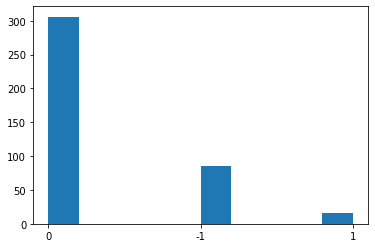

PV-DM with SVM
Number of Neutral Tweet is 306
Number of Positive Tweet is 16
Number of Negative Tweet is 85


In [141]:
import matplotlib.pyplot as plt
import numpy as np
count_1 = 0
count_min = 0
count_0 = 0
y_pred_final=[]
for i in y_pred:
  if i =='-':
    y_pred_final.append('-1')
    count_min = count_min+1 
  else:
    y_pred_final.append(i)
    if i =='1':
      count_1 = count_1+1
    else:
      count_0 = count_0+1
y = np.array(y_pred_final)
plt.hist(y);
plt.show()
print("PV-DM with SVM")
print("Number of Neutral Tweet is "+str(count_0))
print("Number of Positive Tweet is "+str(count_1))
print("Number of Negative Tweet is "+str(count_min))